In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR

from mat2json import loadMat
from util import getBatteryCapacity, getChargingValues, getDischargingValues, getDataframe

In [2]:
#Ambient temp 4

B0053 = loadMat('B0053.mat')
B0054 = loadMat('B0054.mat')
B0055 = loadMat('B0055.mat')
B0056 = loadMat('B0056.mat')

In [3]:
B0053_capacity = getBatteryCapacity(B0053)
B0054_capacity = getBatteryCapacity(B0054)
B0055_capacity = getBatteryCapacity(B0055)
B0056_capacity = getBatteryCapacity(B0056)

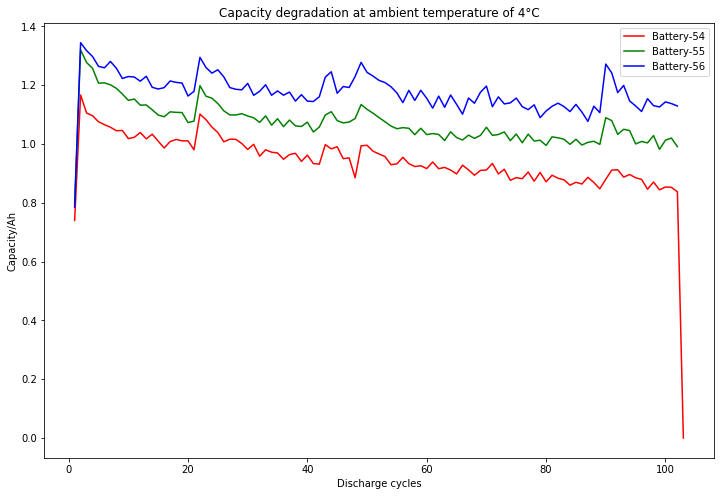

In [4]:
fig, ax = plt.subplots(1, figsize=(12, 8))

ax.plot(B0054_capacity[0], B0054_capacity[1], color='red', label='Battery-54')
ax.plot(B0055_capacity[0], B0055_capacity[1], color='green', label='Battery-55')
ax.plot(B0056_capacity[0], B0056_capacity[1], color='blue', label='Battery-56')
ax.set(xlabel='Discharge cycles', ylabel='Capacity/Ah', title='Capacity degradation at ambient temperature of 4°C')
plt.legend()

In [5]:
ployfit4degree = np.polyfit(B0056_capacity[0], B0056_capacity[1], 1)

In [6]:
pred_range = []
for i in range(1, 270):
    pred_range.append(i)

In [7]:
B0056_capacity_pred = np.polyval(ployfit4degree, pred_range)

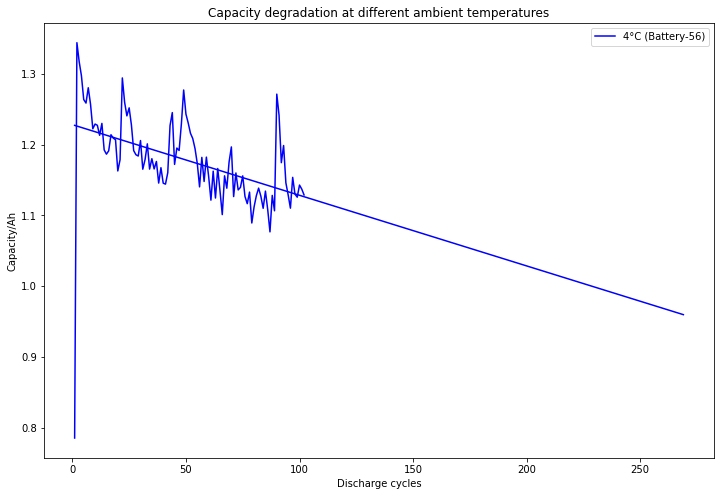

In [8]:
fig, ax = plt.subplots(1, figsize=(12, 8))

ax.plot(B0056_capacity[0], B0056_capacity[1], color='blue', label='4°C (Battery-56)')
ax.plot(pred_range, B0056_capacity_pred, color='blue')

ax.set(xlabel='Discharge cycles', ylabel='Capacity/Ah', title='Capacity degradation at different ambient temperatures')
plt.legend()

In [9]:
B0054_charging = getChargingValues(B0054, 5)
charging_labels = ['Voltage_measured','Current_measured','Temperature_measured']

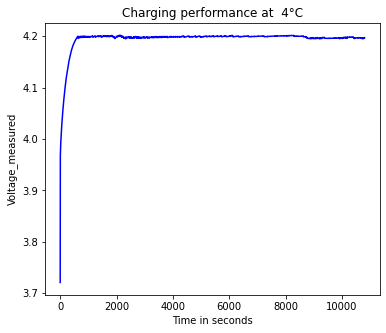

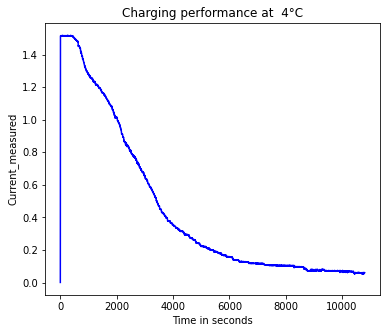

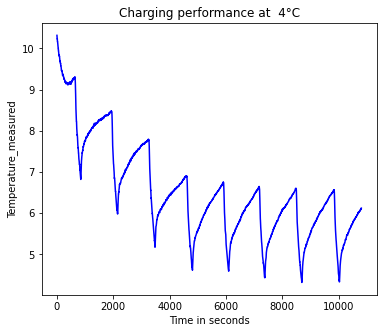

In [10]:
indx = 1
for label in charging_labels:
   
    fig2, ax2 = plt.subplots(1, figsize=(6, 5))

 
    ax2.plot(B0054_charging[5], B0054_charging[indx], color='blue')

   
    ax2.set(xlabel='Time in seconds', ylabel=label, title='Charging performance at  4°C')
    
    indx += 1

In [11]:
B0054_charging_251 = getChargingValues(B0054, 251)

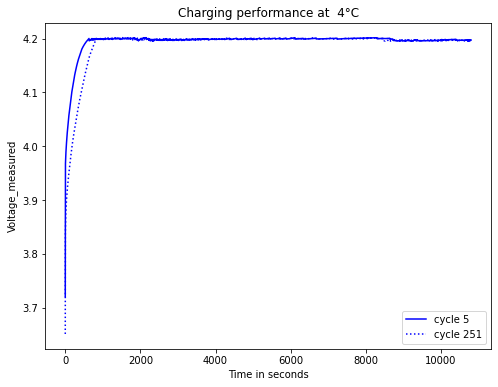

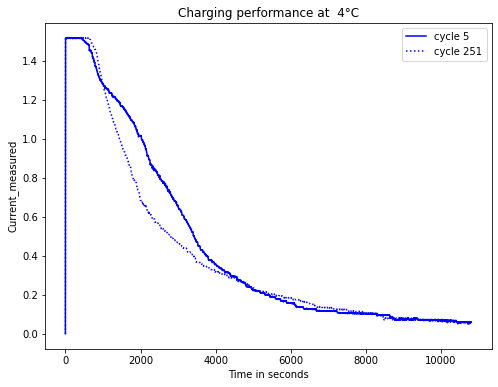

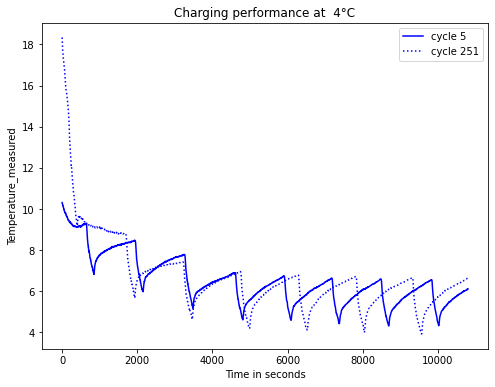

In [12]:
indx = 1
for label in charging_labels:
    
    fig2, ax2 = plt.subplots(1, figsize=(8, 6))

  
    ax2.plot(B0054_charging[5], B0054_charging[indx], color='blue', label='cycle 5')
    ax2.plot(B0054_charging_251[5], B0054_charging_251[indx], linestyle=':', color='blue', label='cycle 251')


    ax2.set(xlabel='Time in seconds', ylabel=label, title='Charging performance at  4°C')
   
    ax2.legend()
    
    indx += 1

In [13]:
B0054_discharging = getDischargingValues(B0054, 0)
discharging_labels = ['Voltage_measured','Current_measured','Temperature_measured']

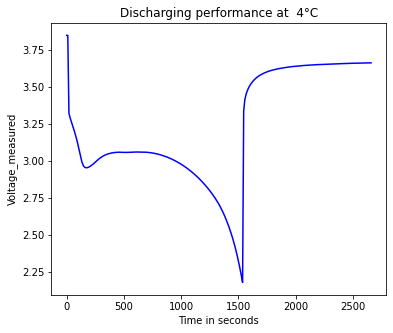

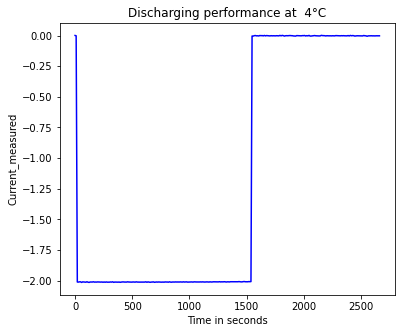

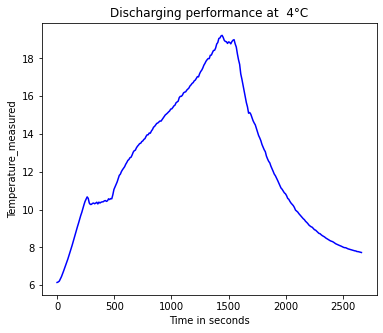

In [14]:
indx = 1
for label in discharging_labels:
    
    fig2, ax2 = plt.subplots(1, figsize=(6, 5))

   
    ax2.plot(B0054_discharging[5], B0054_discharging[indx], color='blue')

    ax2.set(xlabel='Time in seconds', ylabel=label, title='Discharging performance at  4°C')
    
    indx += 1

In [15]:
B0054_discharging_250 = getDischargingValues(B0054, 250)

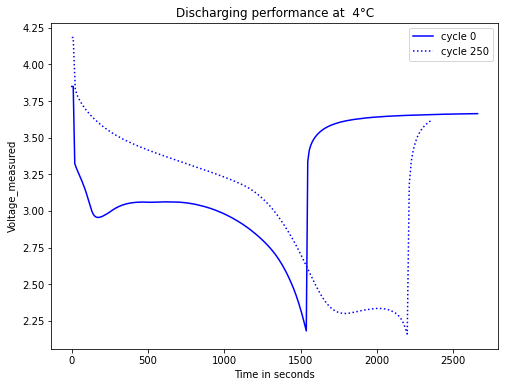

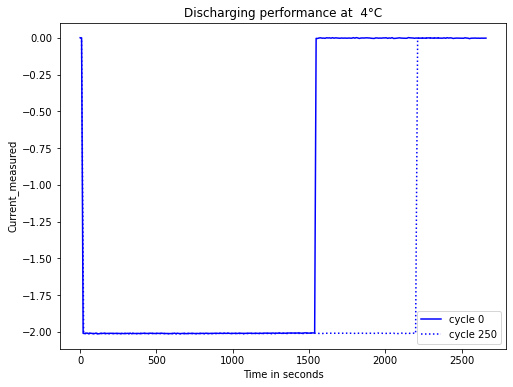

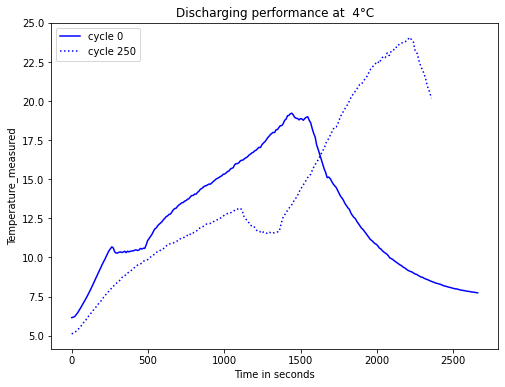

In [16]:
indx = 1
for label in charging_labels:
  
    fig2, ax2 = plt.subplots(1, figsize=(8, 6))

  
    ax2.plot(B0054_discharging[5], B0054_discharging[indx], color='blue', label='cycle 0')
    ax2.plot(B0054_discharging_250[5], B0054_discharging_250[indx], linestyle=':', color='blue', label='cycle 250')

   
    ax2.set(xlabel='Time in seconds', ylabel=label, title='Discharging performance at  4°C')
    
    ax2.legend()
    
    indx += 1

In [17]:
B0054_discharging_124 = getDischargingValues(B0054, 124)
B0054_discharging_52 = getDischargingValues(B0054, 52)

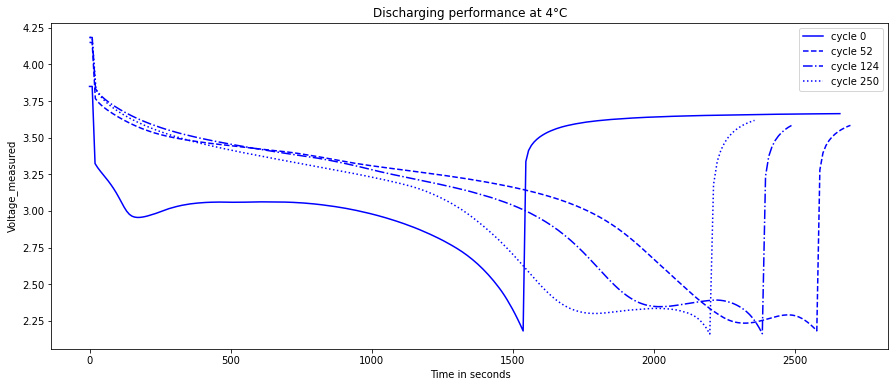

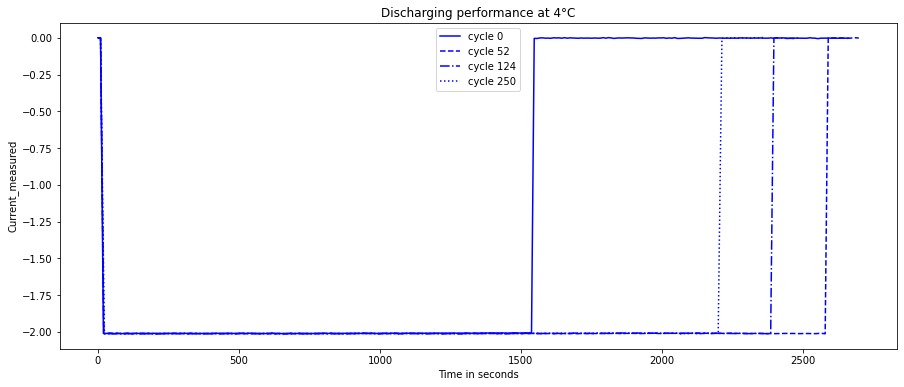

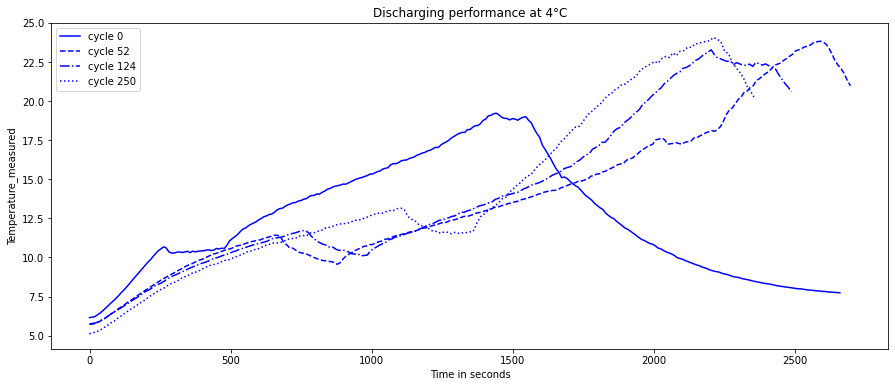

In [18]:
indx = 1
for label in charging_labels:
    fig, ax = plt.subplots(1, figsize=(15, 6))

    ax.plot(B0054_discharging[5], B0054_discharging[indx], color='blue', label='cycle 0')
    ax.plot(B0054_discharging_52[5], B0054_discharging_52[indx], linestyle='--', color='blue', label='cycle 52')
    ax.plot(B0054_discharging_124[5], B0054_discharging_124[indx], linestyle='-.', color='blue', label='cycle 124')
    ax.plot(B0054_discharging_250[5], B0054_discharging_250[indx], linestyle=':', color='blue', label='cycle 250')

    ax.set(xlabel='Time in seconds', ylabel=label, title='Discharging performance at 4°C')
    ax.legend()
    
    indx += 1

In [19]:
dfB0053 = getDataframe(B0053)
dfB0054 = getDataframe(B0054)
dfB0055 = getDataframe(B0055)
dfB0056 = getDataframe(B0056)

In [20]:
X = dfB0053['cycle']
Y = dfB0053['capacity']

In [21]:
ratios = [40, 30, 20, 10]
for ratio in ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=ratio, shuffle=False)
    
    d = {'X_train':X_train.values,'y_train':y_train.values}
    d = pd.DataFrame(d)
  
    X_train = d['X_train']
    y_train = d['y_train']
    X_train = X_train.values.reshape(-1, 1)
    y_train = y_train.values.reshape(-1, 1)
    
    best_svr = SVR(C=20, epsilon=0.0001, gamma=0.0001, cache_size=200,
      kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

    best_svr.fit(X_train,y_train)
    
    if ratio == 40:
        y_pred_40 = best_svr.predict(X.values.reshape(-1, 1))
    elif ratio == 30:
        y_pred_30 = best_svr.predict(X.values.reshape(-1, 1))
    elif ratio == 20:
        y_pred_20 = best_svr.predict(X.values.reshape(-1, 1))
    elif ratio == 10:
        y_pred_10 = best_svr.predict(X.values.reshape(-1, 1))

C:\Users\aryan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\aryan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\aryan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exampl

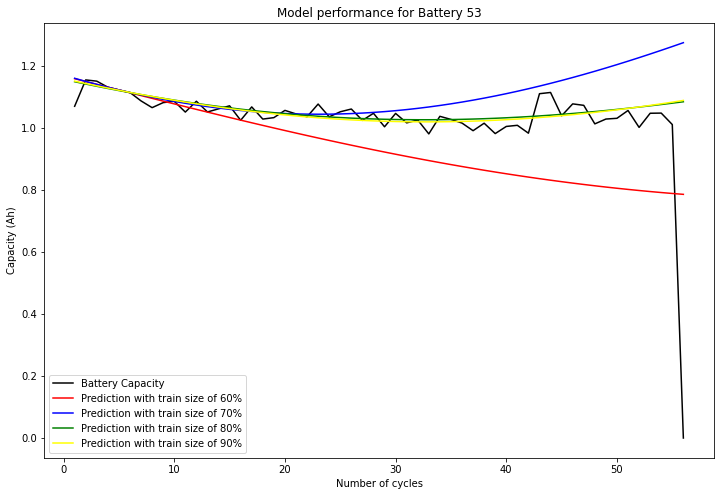

In [22]:
label = "Capacity (Ah)"

fig, ax = plt.subplots(1, figsize=(12, 8))
ax.plot(X, Y, color='black', label='Battery Capacity')
ax.plot(X, y_pred_40, color='red', label='Prediction with train size of 60%')
ax.plot(X, y_pred_30, color='blue', label='Prediction with train size of 70%')
ax.plot(X, y_pred_20, color='green', label='Prediction with train size of 80%')
ax.plot(X, y_pred_10, color='yellow', label='Prediction with train size of 90%')

ax.set(xlabel='Number of cycles', ylabel=label, title='Model performance for Battery 53')
ax.legend()

In [23]:
import sklearn.metrics,math

def sse(pred,actual):
    ss = np.sum((pred - actual)**2)
    return ss

def mse(pred,actual):
    mse = sklearn.metrics.mean_squared_error(actual, pred)
    return mse

def rmse(pred,actual):
    rmse = math.sqrt(mse(pred,actual))
    return rmse

import numpy as np

def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

from sklearn.metrics import r2_score 

def R_square(pred,actual):
    R_square = r2_score(pred, actual) 
    return R_square

import numpy as np
from sklearn.metrics import mean_absolute_error

def mae(pred,actual):
    mae=mean_absolute_error(actual, pred)
    return mae

In [24]:
err=[y_pred_40, y_pred_30, y_pred_20, y_pred_10]
r=40
for e in err:
    print(r)
    print(sse(e,Y))
    print(mse(e,Y))
    print(rmse(e,Y))
    print(R_square(e,Y))
    print(mae(e,Y))
    r=r-10

    bat_break_pred= min(e, key=lambda x:abs(x-0.9))
    print(bat_break_pred)

    bat_break_act= min(Y, key=lambda x:abs(x-0.9))
    print(bat_break_act)

    a=0
    for i in e:
        a=a+1
        if(i==bat_break_pred):
            print(a)

    a=0
    for i in Y:
        a=a+1
        if(i==bat_break_act):
            print(a)
        


40
1.7049387862851657
0.03044533546937796
0.17448591768213836
-1.3768380145955716
0.12288458818013732
0.9008402650046226
0.9801331625592913
32
33
30
2.068568599773721
0.0369387249959593
0.19219449782956666
-8.191002234084966
0.08268734268473185
1.0435403790465458
0.9801331625592913
23
33
20
1.2276699904864168
0.021922678401543157
0.1480630892611091
-19.388682057102297
0.04269683030116559
1.0257361382879606
0.9801331625592913
33
33
10
1.2375792920987783
0.02209963021604961
0.14865944374996704
-16.454937528837267
0.042602944389195194
1.018944061199306
0.9801331625592913
33
33
